# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [3]:
import cv2
from PIL import Image

In [4]:
data_dir = 'data' 
image_exts = ['JPEG','JPG', 'BMP', 'PNG']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = Image.open(image_path).format
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

# 3. Load Data

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

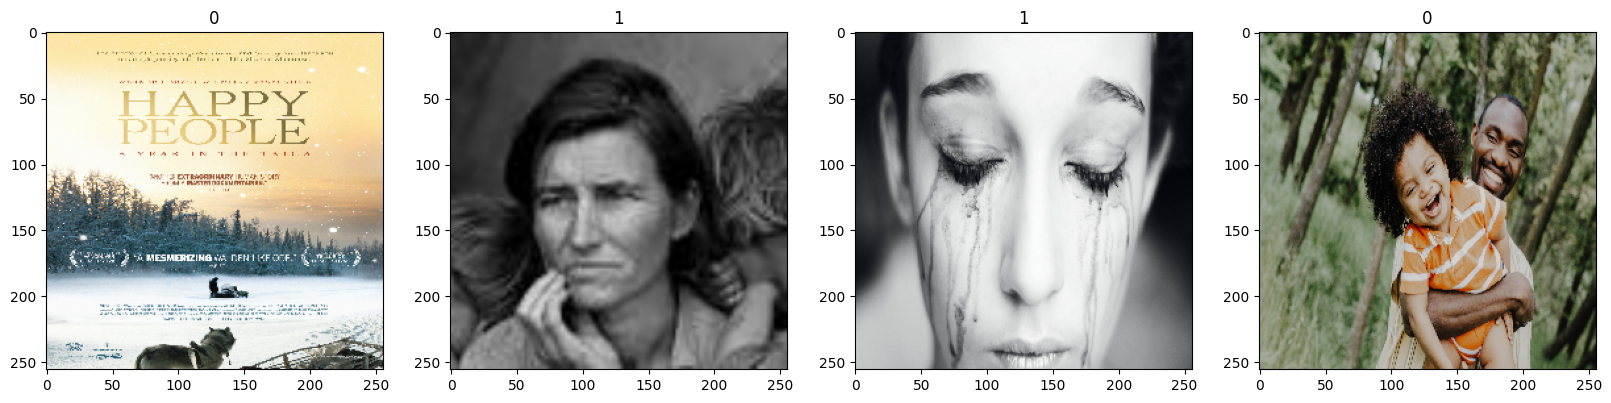

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [10]:
data = data.map(lambda x,y: (x/255, y))

In [11]:
data.as_numpy_iterator().next()

(array([[[[2.58823544e-01, 3.68627459e-01, 7.84313753e-02],
          [2.52115101e-01, 3.54075879e-01, 6.78013787e-02],
          [2.31771499e-01, 3.33732277e-01, 5.53009026e-02],
          ...,
          [9.22241986e-01, 9.61457670e-01, 6.80881679e-01],
          [9.20129836e-01, 9.61980283e-01, 6.56699896e-01],
          [9.16884065e-01, 9.52178180e-01, 6.32677555e-01]],
 
         [[2.58823544e-01, 3.68627459e-01, 7.84313753e-02],
          [2.49299586e-01, 3.51260364e-01, 6.49858639e-02],
          [2.28835344e-01, 3.30796123e-01, 5.23647517e-02],
          ...,
          [9.27198231e-01, 9.64393854e-01, 6.94939196e-01],
          [9.19638455e-01, 9.61488962e-01, 6.60232842e-01],
          [9.13725495e-01, 9.51799929e-01, 6.17968738e-01]],
 
         [[2.54365146e-01, 3.64169061e-01, 7.39729926e-02],
          [2.43068323e-01, 3.45029116e-01, 5.87545969e-02],
          [2.27450982e-01, 3.29411775e-01, 5.09803928e-02],
          ...,
          [9.33490872e-01, 9.68072712e-01, 7.2191

# 5. Split Data

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
train_size

7

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [15]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 445ms/step - accuracy: 0.4911 - loss: 1.0066 - val_accuracy: 0.6250 - val_loss: 0.5928
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 561ms/step - accuracy: 0.6116 - loss: 0.6344 - val_accuracy: 0.7969 - val_loss: 0.5687
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 386ms/step - accuracy: 0.7500 - loss: 0.5646 - val_accuracy: 0.7344 - val_loss: 0.5261
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 394ms/step - accuracy: 0.7857 - loss: 0.4822 - val_accuracy: 0.7812 - val_loss: 0.3854
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 362ms/step - accuracy: 0.8482 - loss: 0.3763 - val_accuracy: 0.8750 - val_loss: 0.3656
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 361ms/step - accuracy: 0.8482 - loss: 0.3439 - val_accuracy: 0.8438 - val_loss: 0.3414
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 373ms/step - accuracy: 0.9107 - loss: 0.2733 - val_accuracy: 0.9375 - val_loss: 0.1775
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 381ms/step - accuracy: 0.9464 - loss: 0.1823 - val_accuracy: 0.9688 - val_loss: 0.1296
Epo

# 8. Plot Performance

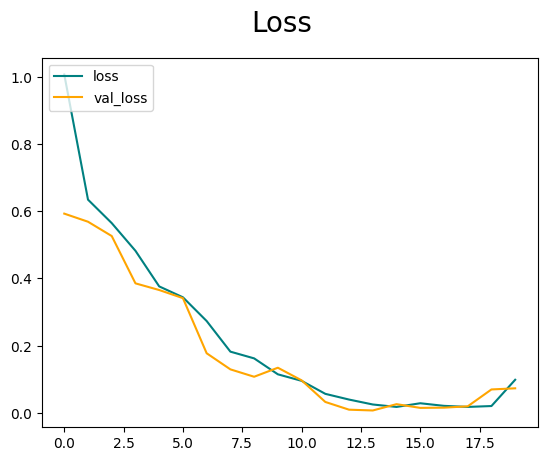

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

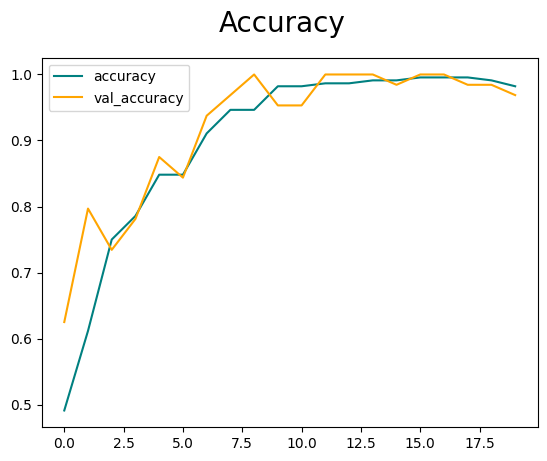

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [26]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [27]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [28]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


2025-10-18 00:30:20.081039: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [29]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [30]:
import cv2

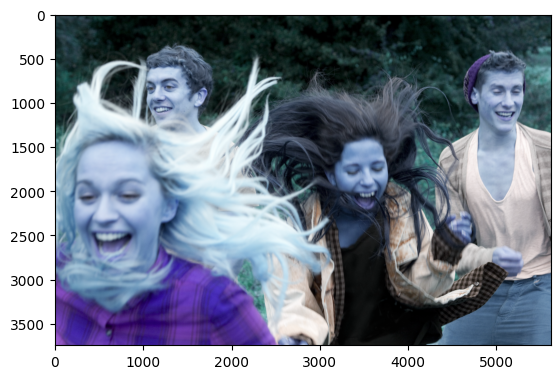

In [31]:
img = cv2.imread('test/happy.jpg')
plt.imshow(img)
plt.show()

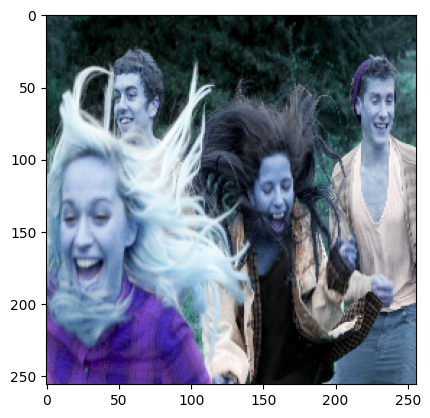

In [32]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [33]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [34]:
yhat

array([[0.04170939]], dtype=float32)

In [35]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [36]:
from tensorflow.keras.models import load_model

In [37]:
model.save(os.path.join('models','imageclassifier.keras'))

In [38]:
new_model = load_model('models/imageclassifier.keras')

In [39]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.04170939]], dtype=float32)